# **Midterm Skills Exam: Data Wrangling and Analysis**



Marquez, Keith Leigh Zhen R.

---



In this activity, you are expected to demonstrate skills learned from concluded modules. Specifically:

Analyze data using tools such as numpy and pandas for data wrangling tasks;
Visualize data using pandas and seaborn;
Perform exploratory data analysis on a complex dataset.
Resources:

Jupyter Lab / Notebook
Dataset: https://archive-beta.ics.uci.edu/dataset/20/census+incomeLinks to an external site.
Submission Requirements:

Perform data wrangling on the given dataset.
Visualize the given dataset.
Submit pdf of exploratory data analysis.
Submit pdf of EDA presentation. Sample: https://aseandse.org/asean-dse-storyboard/Links to an external site.

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ci = pd.concat([X,y], axis=1)
ci

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
ci.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

# Data type conversion

In [5]:
# Convert categorical variables to category data type
ci['workclass'] = ci['workclass'].astype('category')
ci['education'] = ci['education'].astype('category')
ci['marital-status'] = ci['marital-status'].astype('category')
ci['occupation'] = ci['occupation'].astype('category')
ci['relationship'] = ci['relationship'].astype('category')
ci['race'] = ci['race'].astype('category')
ci['sex'] = ci['sex'].astype('category')
ci['native-country'] = ci['native-country'].astype('category')
ci['income'] = ci['income'].astype('category')
ci.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object

# Check for missing values

In [6]:
ci_null=ci.isnull().sum()
ci_null

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

since every row have missing record we will not drop it

In [7]:
ci.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Remove duplicates

In [8]:
# Check for duplicates
duplicate_rows = ci.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 29


In [9]:
ci.drop_duplicates(inplace=True)
ci

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# Sorting

In [10]:
# Sort the DataFrame by 'age' in ascending order
ci_sorted_age = ci.sort_values(by='age', ascending=True)
ci_sorted_age

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48098,17,Federal-gov,29078,11th,7,Never-married,Adm-clerical,Own-child,Amer-Indian-Eskimo,Female,0,0,15,United-States,<=50K.
1389,17,Private,46496,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,5,United-States,<=50K
35107,17,Private,36801,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,18,United-States,<=50K.
6820,17,Private,130795,10th,6,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K
38099,17,Private,23856,11th,7,Never-married,Exec-managerial,Own-child,White,Female,0,0,20,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,90,?,256514,Bachelors,13,Widowed,?,Other-relative,White,Female,991,0,10,United-States,<=50K
18725,90,Local-gov,153602,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,6767,0,40,United-States,<=50K
19489,90,Private,84553,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
18413,90,Private,313749,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K


**New column 'continent' in the DataFrame, where each country is mapped to its corresponding continent based on the description native-country**

In [11]:
continent_dict = {
    'United-States': 'North America',
    'Cambodia': 'Asia',
    'England': 'Europe',
    'Puerto-Rico': 'North America',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Outlying-US(Guam-USVI-etc)': 'Oceania',
    'India': 'Asia',
    'Japan': 'Asia',
    'Greece': 'Europe',
    'South': 'Other',
    'China': 'Asia',
    'Cuba': 'North America',
    'Iran': 'Asia',
    'Honduras': 'North America',
    'Philippines': 'Asia',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Jamaica': 'North America',
    'Vietnam': 'Asia',
    'Mexico': 'North America',
    'Portugal': 'Europe',
    'Ireland': 'Europe',
    'France': 'Europe',
    'Dominican-Republic': 'North America',
    'Laos': 'Asia',
    'Ecuador': 'South America',
    'Taiwan': 'Asia',
    'Haiti': 'North America',
    'Columbia': 'South America',
    'Hungary': 'Europe',
    'Guatemala': 'North America',
    'Nicaragua': 'North America',
    'Scotland': 'Europe',
    'Thailand': 'Asia',
    'Yugoslavia': 'Europe',
    'El-Salvador': 'North America',
    'Trinadad&Tobago': 'North America',
    'Peru': 'South America',
    'Hong': 'Asia',
    'Holand-Netherlands': 'Europe'
}

# Map countries to continents and create 'continent' column
ci['continent'] = ci['native-country'].map(continent_dict)
continent_table = pd.concat([ci['native-country'], ci['continent']], axis=1)
continent_table

,native-country,continent
0,United-States,North America
1,United-States,North America
2,United-States,North America
3,United-States,North America
4,Cuba,North America
...,...,...
48837,United-States,North America
48838,United-States,North America
48839,United-States,North America
48840,United-States,North America


# This shows the count of incomes greater than 50K for each continent

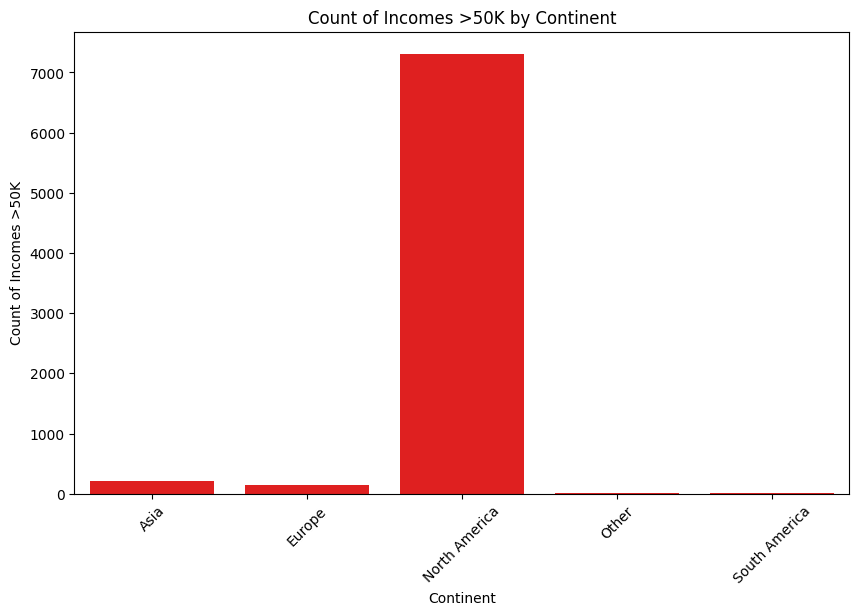

In [12]:
# Filter the dataset for incomes greater than $50K
high_income = ci[ci['income'] == '>50K']

# Group by continent and count the number of high incomes
continent_income_counts = high_income.groupby('continent')['income'].count().reset_index()

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='income', data=continent_income_counts,color='red')
plt.title('Count of Incomes >50K by Continent')
plt.xlabel('Continent')
plt.ylabel('Count of Incomes >50K')
plt.xticks(rotation=45)
plt.show()

The results indicating that North America has the most people with the highest income this means have stronger economies compared to other continents, leading to higher average incomes and more people earning incomes greater than 50K

# 'education_level'
New column 'education_level' in the DataFrame, where 'High Education' corresponds to 'Bachelors', 'Masters', and 'Doctorate', and 'Low Education' corresponds to the rest of the education levels.*

In [13]:
education_mapping = {
    'Bachelors': 'High Education',
    'Masters': 'High Education',
    'Doctorate': 'High Education',
    'Some-college': 'Low Education',
    '11th': 'Low Education',
    'HS-grad': 'Low Education',
    'Prof-school': 'High Education',
    'Assoc-acdm': 'Low Education',
    'Assoc-voc': 'Low Education',
    '9th': 'Low Education',
    '7th-8th': 'Low Education',
    '12th': 'Low Education',
    '1st-4th': 'Low Education',
    '10th': 'Low Education',
    '5th-6th': 'Low Education',
    'Preschool': 'Low Education'
}

# Map education levels to 'education_level' column
ci['education_level'] = ci['education'].map(education_mapping)
education_level_table = pd.concat([ci['education'], ci['education_level']], axis=1)
education_level_table

,education,education_level
0,Bachelors,High Education
1,Bachelors,High Education
2,HS-grad,Low Education
3,11th,Low Education
4,Bachelors,High Education
...,...,...
48837,Bachelors,High Education
48838,HS-grad,Low Education
48839,Bachelors,High Education
48840,Bachelors,High Education


# Income distribution by education level

this shows if there is a connection in education level to their income

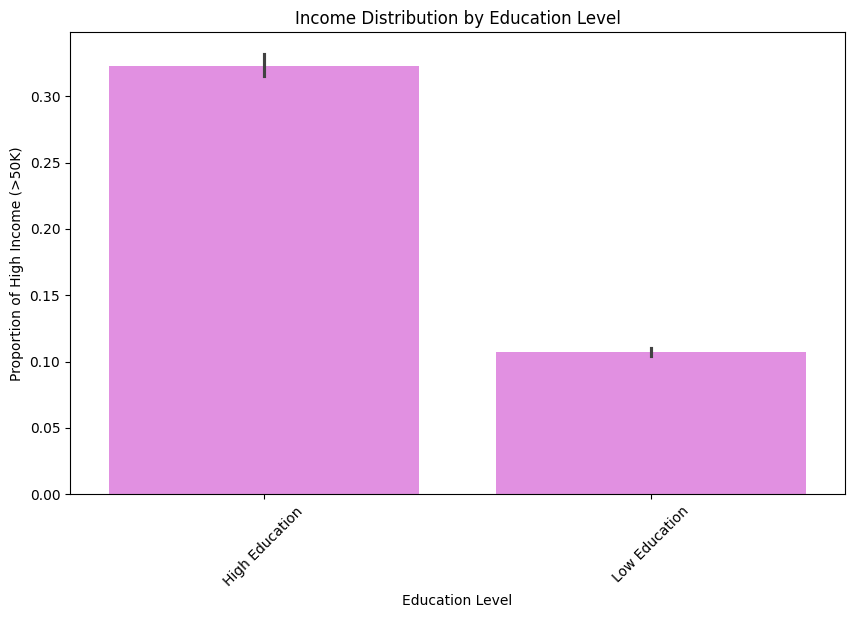

In [14]:
# Plot bar plot of income distribution by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='education_level', y=ci['income'] == '>50K', data=ci, color='violet')
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of High Income (>50K)')
plt.xticks(rotation=45)
plt.show()

The result indicates that the higher education level have higher proportions of individuals with income greater than 50K.

# 'work_hours_category'

Instead of using hours-per-week as a continuous variable, we can categorize it into groups such as part-time, full-time, or overtime.

In [15]:
ci['work_hours_category'] = pd.cut(ci['hours-per-week'], bins=[0, 20, 40, np.inf], labels=['Part-time', 'Full-time', 'Overtime'])
hours_table = pd.concat([ci['work_hours_category'], ci['hours-per-week']], axis=1)
hours_table

,work_hours_category,hours-per-week
0,Full-time,40
1,Part-time,13
2,Full-time,40
3,Full-time,40
4,Full-time,40
...,...,...
48837,Full-time,36
48838,Full-time,40
48839,Overtime,50
48840,Full-time,40


In [16]:
# Count the number of individuals in each income category for each work_hours_category
income_counts = ci.groupby(['work_hours_category', 'income'])['income'].count()

# Print the counts
print(income_counts)

work_hours_category  income
Part-time            <=50K      2729
                     <=50K.     1418
                     >50K        195
                     >50K.       106
Full-time            <=50K     16248
                     <=50K.     8127
                     >50K       3789
                     >50K.      1854
Overtime             <=50K      5721
                     <=50K.     2885
                     >50K       3855
                     >50K.      1886
Name: income, dtype: int64


# To know the distribution of individuals across different work hours categories, segmented by income levels.

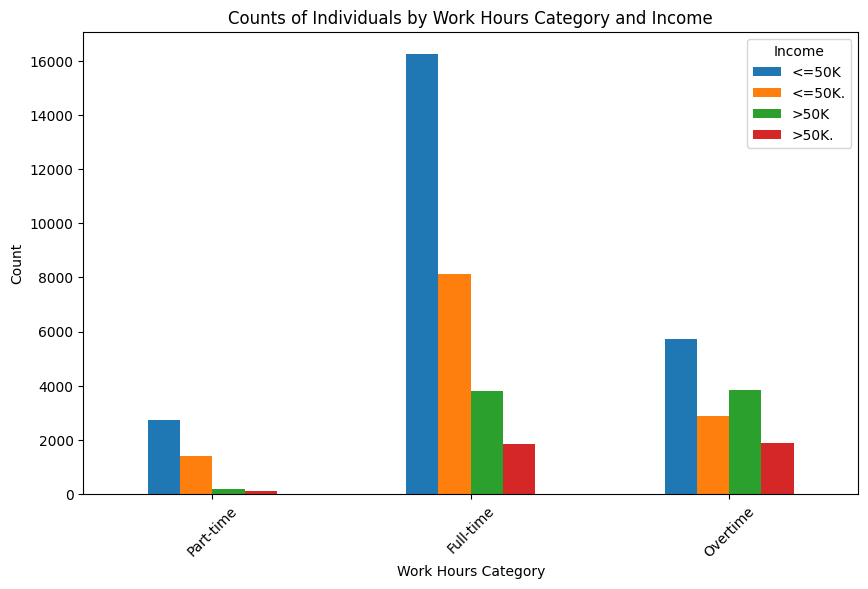

In [17]:
# Create a pivot table to reshape the data for plotting
pivot_table = ci.pivot_table(index='work_hours_category', columns='income', aggfunc='size', fill_value=0)

# Plot the counts of individuals in each income category for each work_hours_category
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Individuals by Work Hours Category and Income')
plt.xlabel('Work Hours Category')
plt.ylabel('Count')
plt.legend(title='Income')
plt.xticks(rotation=45)
plt.show()

The Full-time category has the highest count of individuals for both income levels. In all categories, there are more individuals earning <=50K than those earning >50K.

In [18]:
ci['work_hours_per_year'] = ci['hours-per-week'] * 52
ci['work_hours_per_year']

0        2080
1         676
2        2080
3        2080
4        2080
         ... 
48837    1872
48838    2080
48839    2600
48840    2080
48841    3120
Name: work_hours_per_year, Length: 48813, dtype: int64

In [19]:
# Calculate average age by occupation
avg_age_by_occupation = ci.groupby('occupation')['age'].mean()
avg_age_by_occupation

occupation
?                    40.882800
Adm-clerical         37.196148
Armed-Forces         31.466667
Craft-repair         39.006550
Exec-managerial      42.203156
Farming-fishing      41.324815
Handlers-cleaners    32.659102
Machine-op-inspct    37.742299
Other-service        35.101850
Priv-house-serv      43.554167
Prof-specialty       40.566888
Protective-serv      38.899288
Sales                37.408612
Tech-support         37.161938
Transport-moving     40.651380
Name: age, dtype: float64

In [20]:
# Replace inconsistent values in the 'income' column
ci['income'] = ci['income'].replace({'<=50K.': '<=50K',
                                     '>50K.': '>50K'})

In [21]:
income_counts = ci['income'].value_counts()
income_counts

income
<=50K    37128
>50K     11685
Name: count, dtype: int64

<ipython-input-22-6f4b1cb8d7da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=ci,palette='Set1')


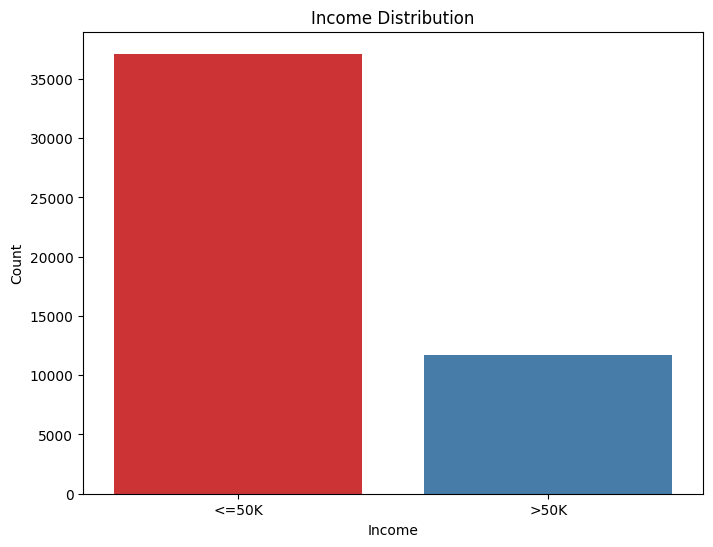

In [22]:
# Plot the distribution of income
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=ci,palette='Set1')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

This indicates that a lot of individuals in the dataset (37,128 out of 48,813) earn less than or equal to 50K. This means that the dataset contains a large proportion of individuals with lower income

<ipython-input-23-0ff5f4796957>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_income', y='occupation', data=mean_inc_occ_sorted, palette='viridis')


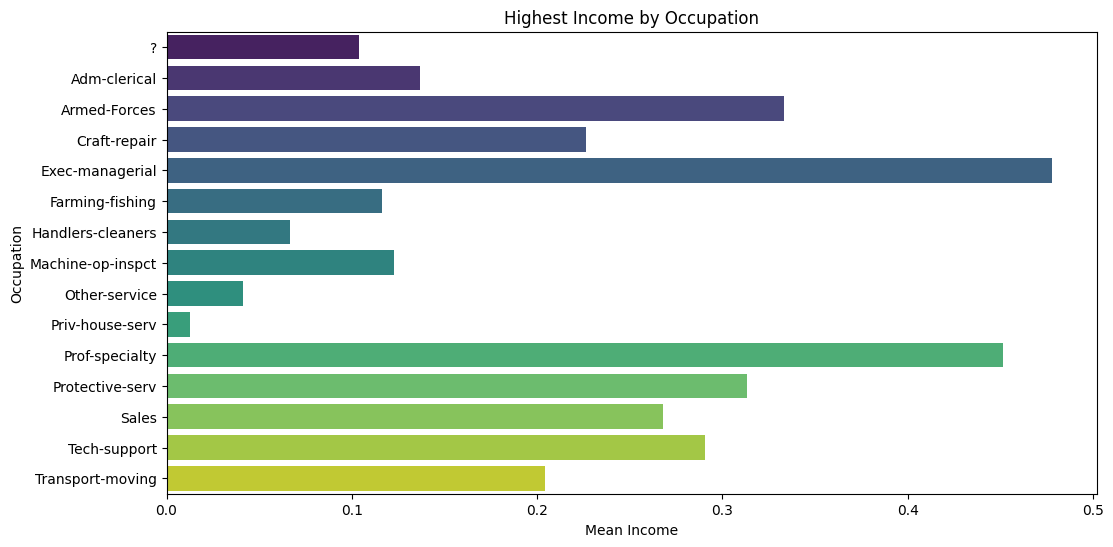

In [23]:
# Calculate the mean income for each occupation
mean_inc_occ = ci.groupby('occupation')['income'].apply(lambda x: (x == '>50K').mean()).reset_index()
mean_inc_occ.columns = ['occupation', 'mean_income']

# Sort the occupations by mean income
mean_inc_occ_sorted = mean_inc_occ.sort_values(by='mean_income', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='mean_income', y='occupation', data=mean_inc_occ_sorted, palette='viridis')
plt.title('Highest Income by Occupation')
plt.xlabel('Mean Income')
plt.ylabel('Occupation')
plt.show()

The 'Exec-managerial' occupation has the highest mean income among all the occupations in the dataset.

This insight is valuable for understanding the income distribution across different occupations and identifying which occupations tend to have higher average incomes.

# 'capital-net'

**'capital-net'** represents the net capital gain or loss for each individual. By subtracting the 'capital-loss' from the 'capital-gain', this encapsulates the overall financial gain or loss from investments or other financial activities.

In [24]:
ci['capital-net'] = ci['capital-gain'] - ci['capital-loss']
ci

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,continent,education_level,work_hours_category,work_hours_per_year,capital-net
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North America,High Education,Full-time,2080,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North America,High Education,Part-time,676,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North America,Low Education,Full-time,2080,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North America,Low Education,Full-time,2080,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North America,High Education,Full-time,2080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,North America,High Education,Full-time,1872,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K,North America,Low Education,Full-time,2080,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,North America,High Education,Overtime,2600,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,North America,High Education,Full-time,2080,5455


# Capital Gain/Loss Ratio

In [25]:
ci['capital_ratio'] = ci['capital-gain'] / (ci['capital-loss'] + 1)  # Adding 1 to avoid division by zero
capital_ratio_table = pd.concat([ci['capital-gain'], ci['capital-loss'], ci['capital_ratio']], axis=1)
capital_ratio_table

,capital-gain,capital-loss,capital_ratio
0,2174,0,2174.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0
...,...,...,...
48837,0,0,0.0
48838,0,0,0.0
48839,0,0,0.0
48840,5455,0,5455.0


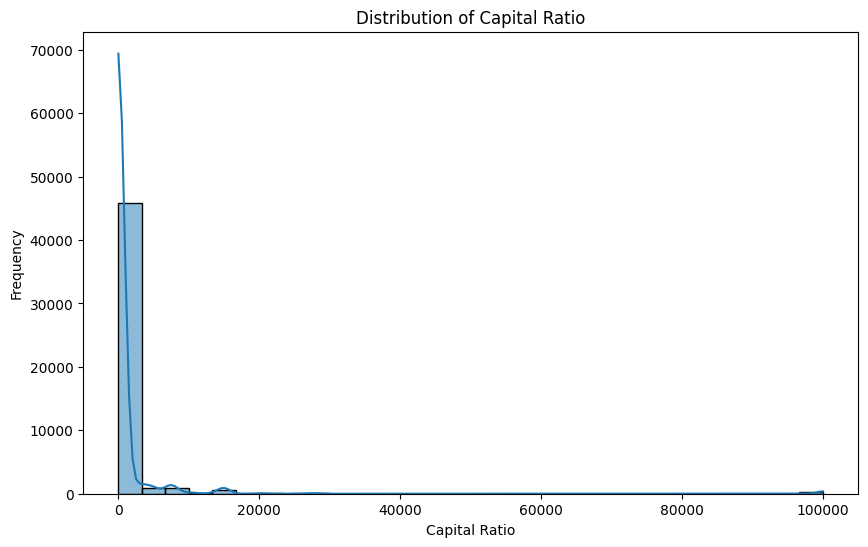

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of capital_ratio
plt.figure(figsize=(10, 6))
sns.histplot(ci['capital_ratio'], bins=30, kde=True)
plt.title('Distribution of Capital Ratio')
plt.xlabel('Capital Ratio')
plt.ylabel('Frequency')
plt.show()

The 'capital_ratio' column in the dataset presents insights into the relative balance of capital gains and losses among sampled individuals. Analysis for the first row illustrates a substantial capital gain, indicative of potentially financial activities. For the row that have 0.0, suggesting financial inactivity or unreported information. This offers valuable insights into financial behaviors and outcomes, emphasizing varying levels of financial success and activity.

In [27]:
# Calculate average hours worked per week by education level
avg_hours_per_week_education = ci.groupby('education')['hours-per-week'].mean()
avg_hours_per_week_education

education
10th            36.986321
11th            33.952539
12th            35.413110
1st-4th         38.751020
5th-6th         38.891732
7th-8th         39.002096
9th             38.359788
Assoc-acdm      40.809494
Assoc-voc       41.659223
Bachelors       42.484040
Doctorate       46.582492
HS-grad         40.640553
Masters         43.573419
Preschool       36.402439
Prof-school     47.579137
Some-college    38.876898
Name: hours-per-week, dtype: float64

In [28]:
# Calculate median age by occupation and gender
median_age_occupation_gender = ci.groupby(['occupation', 'sex'])['age'].median()
median_age_occupation_gender

occupation         sex   
?                  Female    29.0
                   Male      46.5
Adm-clerical       Female    35.0
                   Male      36.0
Armed-Forces       Female     NaN
                   Male      29.0
Craft-repair       Female    39.0
                   Male      38.0
Exec-managerial    Female    39.0
                   Male      42.0
Farming-fishing    Female    36.0
                   Male      39.0
Handlers-cleaners  Female    32.0
                   Male      29.0
Machine-op-inspct  Female    37.0
                   Male      36.0
Other-service      Female    33.0
                   Male      31.0
Priv-house-serv    Female    44.5
                   Male      23.0
Prof-specialty     Female    38.0
                   Male      41.0
Protective-serv    Female    33.0
                   Male      37.0
Sales              Female    29.0
                   Male      38.0
Tech-support       Female    34.0
                   Male      37.0
Transport-moving   Fem

# What occupation has a higher income for females

<ipython-input-29-d8a96d31c475>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ci['income'] == '>50K', y='occupation', data=female_data, palette='viridis')


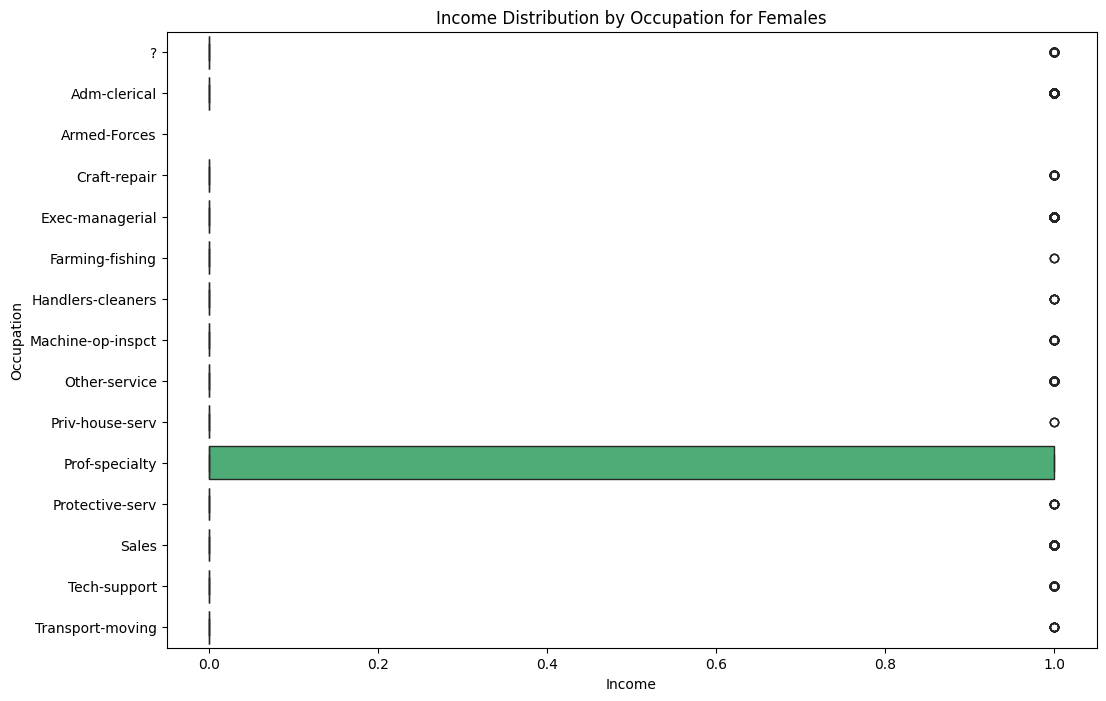

In [29]:
# Filter data for females
female_data = ci[ci['sex'] == 'Female']

# Create a swarm plot of income by occupation for females
plt.figure(figsize=(12, 8))
sns.boxplot(x=ci['income'] == '>50K', y='occupation', data=female_data, palette='viridis')
plt.title('Income Distribution by Occupation for Females')
plt.xlabel('Income')
plt.ylabel('Occupation')
plt.show()

Prof-specialty have the highest income in the occupation for females. It also implies that there is a correlation between high education level and higher income, as professions requiring advanced education ('Prof-specialty') have a higher income

# To know the comparison of the distribution of hours worked per week across various education levels.

<ipython-input-30-5a689d20326e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education', y='hours-per-week', data=ci,palette='magma')


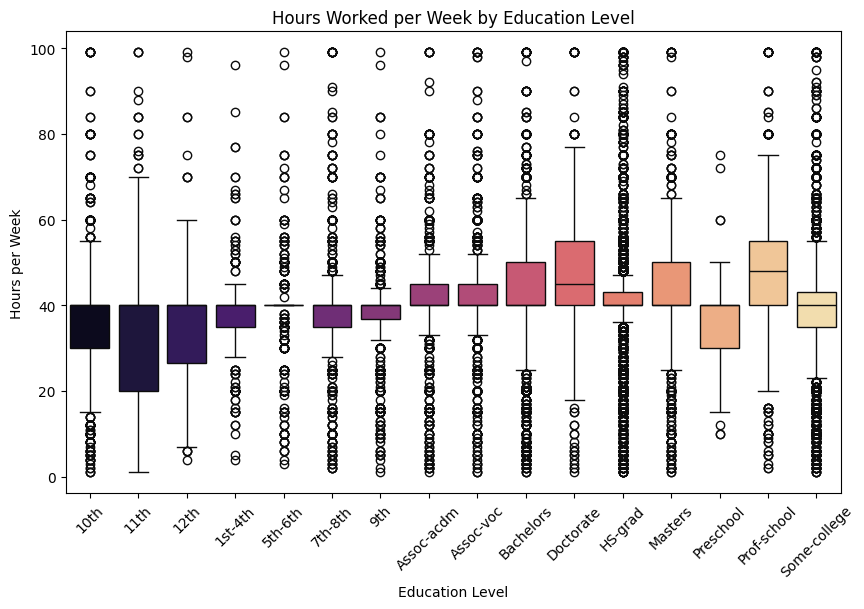

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='hours-per-week', data=ci,palette='magma')
plt.title('Hours Worked per Week by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Hours per Week')
plt.xticks(rotation=45)
plt.show()

Individuals with higher education levels, such as professional degrees and doctorates, have a wider range of work hours, which could indicate variability in job types or flexibility in work schedules. Work hours seem to increase with higher education levels, suggesting that individuals with more education may be engaged in jobs that require, or allow, more hours of work per week.

# Reorder columns

In [31]:
# Define the desired order of columns
desired_order = ['age',
                 'workclass',
                 'fnlwgt',
                 'education',
                 'education-num',
                 'education_level',
                 'marital-status',
                 'occupation',
                 'relationship',
                 'race',
                 'sex',
                 'capital-gain',
                 'capital-loss',
                 'capital-net',
                 'capital_ratio',
                 'hours-per-week',
                 'work_hours_category',
                 'work_hours_per_year',
                 'native-country',
                 'continent',
                 'income']

# Reorder columns
ci_reordered = ci[desired_order]

In [32]:
ci_reordered

,age,workclass,fnlwgt,education,education-num,education_level,marital-status,occupation,relationship,race,...,capital-gain,capital-loss,capital-net,capital_ratio,hours-per-week,work_hours_category,work_hours_per_year,native-country,continent,income
0,39,State-gov,77516,Bachelors,13,High Education,Never-married,Adm-clerical,Not-in-family,White,...,2174,0,2174,2174.0,40,Full-time,2080,United-States,North America,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,High Education,Married-civ-spouse,Exec-managerial,Husband,White,...,0,0,0,0.0,13,Part-time,676,United-States,North America,<=50K
2,38,Private,215646,HS-grad,9,Low Education,Divorced,Handlers-cleaners,Not-in-family,White,...,0,0,0,0.0,40,Full-time,2080,United-States,North America,<=50K
3,53,Private,234721,11th,7,Low Education,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,0,0,0,0.0,40,Full-time,2080,United-States,North America,<=50K
4,28,Private,338409,Bachelors,13,High Education,Married-civ-spouse,Prof-specialty,Wife,Black,...,0,0,0,0.0,40,Full-time,2080,Cuba,North America,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,High Education,Divorced,Prof-specialty,Not-in-family,White,...,0,0,0,0.0,36,Full-time,1872,United-States,North America,<=50K
48838,64,NaN,321403,HS-grad,9,Low Education,Widowed,NaN,Other-relative,Black,...,0,0,0,0.0,40,Full-time,2080,United-States,North America,<=50K
48839,38,Private,374983,Bachelors,13,High Education,Married-civ-spouse,Prof-specialty,Husband,White,...,0,0,0,0.0,50,Overtime,2600,United-States,North America,<=50K
48840,44,Private,83891,Bachelors,13,High Education,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,...,5455,0,5455,5455.0,40,Full-time,2080,United-States,North America,<=50K


# Save file

In [33]:
new_ci = ci.to_csv('NewCensusIncome.csv', index=False)

# Conclusion

I have examined important aspects of data manipulation, visualization, and analysis using Python's Pandas and Seaborn libraries. Through data wrangling tasks, I've performed how to concatenate columns, create new features, and summarize data to prepare it for analysis. With visualization techniques, I've uncovered insights into the dataset's characteristics and relationships between variables, employing histograms, box plots, and bar plots to explore distributions and compare groups. These exercises have equipped me with the ability to discern patterns, such as the distribution of capital gains relative to losses or the relationship between work hours and income levels. By mastering these fundamental skills, I've make a solid insights for more advanced data science learnings, empowering every student to extract meaningful insights and make informed decisions from data.